<a href="https://colab.research.google.com/github/cdavid2804/test-1/blob/main/Prueba1FRL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fundamentos de Aprendizaje por refuerzo**

Elaborado por: Ing. Christian Camacho

# Prueba Práctica 1

Temas a evaluar:
- Regresión lineal
- Regresión logística
- Redes neuronales

## Regresión lineal

A continuación encontrará 2 problemas de regresión lineal. El primer problema consiste en desarrollar un modelo de regresión lineal simple, mientras que el segundo problema consiste en realizar un modelo de regresión lineal múltiple.

### Regresión lineal simple (2 ptos)

Complete el código faltante del modelo de regresión lineal simple en función de lo que se pide.

**Librerías**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

**Cargar dataset**

A continuación se presenta un dataset pequeño que representa el salario (`Salary`) en función de los años de experiencia (`YearsExperience`).  

In [ ]:
data = pd.read_csv(filepath_or_buffer='https://raw.githubusercontent.com/cdavid2804/test-1/main/Salary_Data.csv')
print(np.shape(data))
data

(30, 2)


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


**Visualizar los datos**

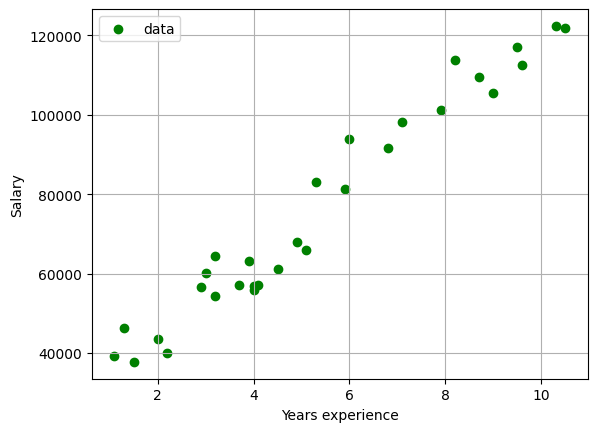

In [ ]:
X = data['YearsExperience']
y = data['Salary']
X = X.values
y = y.values
plt.scatter(X, y, c="green", label="data")
plt.xlabel("Years experience")
plt.ylabel("Salary")
plt.grid()
plt.legend()

**Dividir los datos**

- Dividir el conjunto de datos en: 10% en datos de prueba y 90% en datos de entrenamiento

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=0)
np.shape(X_train)
X_train

array([ 3.9,  9.5,  8.7,  9.6,  4. ,  5.3,  7.9,  2.9,  5.1,  3.2,  4.5,
        8.2,  6.8,  1.3, 10.5,  3. ,  2.2,  5.9,  6. ,  3.7,  3.2,  9. ,
        2. ,  1.1,  7.1,  4.9,  4. ])

**Modelo de regresión lineal simple**

- A partir de las ecuaciones detalladas a continuación encontrar los coeficientes $(\beta_0, \beta_1)$ del modelo de regresión lineal simple.
- Encontrar las prediciones $(\hat{y})$ para los datos de prueba.
- Evaluar el modelo con la métrica: $R^2$

$$\beta_0=\bar{y}-\beta_1\bar{x} $$

$$\beta_1 = \frac{SS_{xy}}{SS_{xx}}$$

$$SS_{xy}=\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})$$

$$SS_{xx}=\sum_{i=1}^{n}(x_i - \bar{x})^2$$

$$\hat{y_i} = \beta_0 + \beta_1 x_i$$


Coeficientes

In [ ]:
def coeficientes(X, y):
    mean_X = sum(X) / len(X)
    mean_y = sum(y) / len(y)

    # Calcular los términos necesarios para los coeficientes de la regresión
    SSxy = 0
    SSxx = 0

    for i in range(len(X)):
        SSxy += (X[i] - mean_X) * (y[i] - mean_y)
        SSxx += (X[i] - mean_X) ** 2

    # Calcular el coeficiente beta_1 (pendiente)
    beta_1 = SSxy / SSxx

    # Calcular el coeficiente beta_0 (intercepto)
    beta_0 = mean_y - (beta_1 * mean_X)

    return beta_0, beta_1
beta_0, beta_1 = coeficientes(X_train, y_train)
print("beta_0: ",beta_0)
print("beta_1: ",beta_1)

beta_0:  26562.39929260697
beta_1:  9377.715812540848


Predicciones

In [ ]:
y_pred = beta_0 + beta_1*X_test

print("y_pred: ",y_pred)
print("y_real:", y_test)

Coeficientes: 26562.39929260697 9377.715812540848
y_pred:  [ 40628.97301142 123152.87216178  65011.03412402]
y_real: [ 37731. 122391.  57081.]


Métrica de evaluación

In [ ]:
# Calcular el RSS y TSS
rss = np.sum((y_test - y_pred)**2)
tss = np.sum((y_test - np.mean(y_test))**2)

# Calcular el Coeficiente de Determinación (R2)
r2 = 1 - (rss / tss)

print('Coeficiente de determinación (R^2):', r2)

Coeficiente de determinación (R^2): 0.9817404960196033


### Regresión lineal múltiple (2 ptos)

A continuación, complete el código faltante del modelo de `regresión lineal múltiple` según lo que se pide.



**Librerías**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

**Cargar dataset**

El siguiente dataset presenta el precio de un automóvil (`Selling_Price`) que depende de muchos factores como:
- El año de fabricación del coche (`Year`)
- La marca del coche (`Car_Name`)
- Precio actual (`Present_Price`)
- Kilómetros recorridos (`Driven_kms`)
- Tipo de combustible (`Fuel_Type`)
- Tipo de vendedor (`Selling_Type`)
- Tipo de transmisión (`Transmission`)

Se desea desarrollor un modelo de regresión lineal por MSE para predecir el precio de un automóvil.

In [ ]:
data = pd.read_csv(filepath_or_buffer="https://raw.githubusercontent.com/cdavid2804/test-1/main/Car_Price.csv")
print(np.shape(data))
data.sample(10)

(301, 9)


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
16,ertiga,2015,7.25,10.79,41678,Diesel,Dealer,Manual,0
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
188,Hero Glamour,2013,0.25,0.57,18000,Petrol,Individual,Manual,0
84,innova,2005,3.49,13.46,197176,Diesel,Dealer,Manual,0
243,i20,2016,6.25,7.60,7000,Petrol,Dealer,Manual,0
101,UM Renegade Mojave,2017,1.70,1.82,1400,Petrol,Individual,Manual,0
240,verna,2012,5.35,9.40,32322,Diesel,Dealer,Manual,0
185,Suzuki Access 125,2008,0.25,0.58,1900,Petrol,Individual,Automatic,0
244,verna,2013,5.95,9.40,49000,Diesel,Dealer,Manual,0


**Dividir los datos**

- Escoger las características que usted crea conveniente para el modelo de `regresión lineal`.
- Dividir el conjunto de datos en: 5% en datos de prueba y 95% en datos de entrenamiento

In [ ]:
X = data[['Year','Present_Price','Driven_kms']]
y = data['Selling_Price']
X = X.values
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)
print("Training data: ",np.shape(X_train))
print("Test data: ",np.shape(X_test))

Training data:  (285, 3)
Test data:  (16, 3)


**Calcular los coeficientes del modelo**

Usar el método de MSE usando la siguiente ecuación:

$$\beta=(X^T X)^{-1}X^{T}y $$

Para determinar término independiente ($\beta_0$) se agregar una columna de unos a la matriz de características ($X$).

In [ ]:
X_train = np.concatenate((np.ones((X.shape[0],1)), X_train),axis=1)
X_test = np.concatenate((np.ones((X.shape[0],1)), X_test),axis=1)

Determinar los coeficientes ($\beta_0,\beta_1,\beta_2...,\beta_n $)

In [ ]:
def coeficientes(X, y):
    X_T = np.transpose(X)
    betas = np.linalg.inv(X_T @ X) @ X_T @ y
    return betas
betas = coeficientes(X_train, y_train)
print("Coeficientes:")
print("betas : ",betas)

Coeficientes:
betas :  [-9.70962370e+02  4.82557136e-01  5.24397122e-01 -1.31759879e-06]


**Realizar predicciones de los datos de prueba**

$\hat{y}=\beta_0 + \beta_1x_1 + \beta_2x_2 + \beta_3x_3 + ...+\beta_nx_n$

In [ ]:
y_pred = np.sum(betas * X_test, axis=1)
print("y_pred: ",y_pred)
print("y_real:", y_test)

y_pred:  [ 2.1401      8.99014963  4.79286448 -0.28717927 10.13146977  6.01205849
  2.12686507  1.35863041  2.13754407  6.06616116  7.99002524  1.15252761
  7.2016791   2.6211028   5.2951856   2.90441924]
y_real: [ 0.35 10.11  4.95  0.15  6.95  7.45  1.1   0.5   0.45  6.    9.25  1.1
  7.5   0.4   6.15  2.65]


**Evaluar el modelo con la métrica: $R^2$**

In [ ]:
# Calcular el RSS y TSS
rss = np.sum((y_test - y_pred)**2)
tss = np.sum((y_test - np.mean(y_test))**2)

# Calcular el Coeficiente de Determinación (R2)
r2 = 1 - (rss / tss)

print('Coeficiente de determinación (R^2):', r2)

Coeficiente de determinación (R^2): 0.8492439418908639


## Regresión logística (2 ptos)

Complete el código faltante del modelo de regresión logística según lo que se pide.

**Librerías**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

**Cargar dataset**

Este conjunto de datos contiene información relacionada con el vino tinto y varios factores que afectan la calidad. Este conjunto de datos fue adquirido y descargado del Repositorio de Aprendizaje Automático de la UCI.

Información de atributos:

Variables de entrada (basadas en pruebas fisicoquímicas):
- acidez fija (`fixed acidity`)
- acidez volátil (`volatile acidity`)
- ácido cítrico (`citric acid`)
- azúcar residual (`residual sugar`)
- cloruros (`chlorides`)
- dióxido de azufre libre (`free sulfur dioxide`)
- dióxido de azufre total (`total sulfur dioxide`)
- densidad (`density`)
- pH (`pH`)
- sulfatos (`sulphates`)
- alcohol (`alcohol`)

Variable de salida (basada en datos sensoriales):
- calidad (`quality`)

  {buena: 1 y mala: 0}

In [ ]:
data = pd.read_csv(filepath_or_buffer="https://raw.githubusercontent.com/cdavid2804/test-1/main/Wine.csv")
mapeo = {'good':1, 'bad':0}
data['quality'] = data['quality'].map(mapeo)

print(np.shape(data))
data.sample(10)

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
71,7.7,0.670,0.23,2.1,0.088,17.0,96.0,0.99620,3.32,0.48,9.5,0
1531,6.1,0.705,0.10,2.8,0.081,13.0,28.0,0.99631,3.60,0.66,10.2,0
25,6.3,0.390,0.16,1.4,0.080,11.0,23.0,0.99550,3.34,0.56,9.3,0
827,7.1,0.460,0.14,2.8,0.076,15.0,37.0,0.99624,3.36,0.49,10.7,0
228,7.7,0.430,0.25,2.6,0.073,29.0,63.0,0.99615,3.37,0.58,10.5,1
766,8.8,0.590,0.18,2.9,0.089,12.0,74.0,0.99738,3.14,0.54,9.4,0
770,7.1,0.590,0.02,2.3,0.082,24.0,94.0,0.99744,3.55,0.53,9.7,1
1106,8.2,0.230,0.42,1.9,0.069,9.0,17.0,0.99376,3.21,0.54,12.3,1
1391,8.0,0.640,0.22,2.4,0.094,5.0,33.0,0.99612,3.37,0.58,11.0,0
1379,7.5,0.570,0.02,2.6,0.077,11.0,35.0,0.99557,3.36,0.62,10.8,1


**Dividir los datos**

- Escoger las características que usted crea conveniente para el modelo de regresión logística.
- Normalizar los datos
- Dividir el conjunto de datos en: 90% en datos de entrenamiento y 10% en datos de prueba.

Elección de las características de los datos para el modelo

In [ ]:
X = data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
y = data['quality']
X = X.values
y = y.values

Normalización de datos

In [ ]:
X_norm = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
X_norm

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

División de datos en entrenamiento y prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.1, random_state=0)
print("Training data: ",np.shape(X_train))
print("Test data: ",np.shape(X_test))

Training data:  (1439, 11)
Test data:  (160, 11)


**Regresión logística: Algoritmo**

- Agregar una vector columna de "$1$" a $X$ (coeficiente de intersección)

$$X=\begin{bmatrix}
x_{11} & x_{12} & \cdots & x_{1n} \\
x_{21} & x_{22} & \cdots & x_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
x_{m1} & x_{m2} & \cdots & x_{mn}  
\end{bmatrix}\rightarrow X=\begin{bmatrix}
1 & x_{11} & x_{12} & \cdots & x_{1n} \\
1 & x_{21} & x_{22} & \cdots & x_{2n} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{m1} & x_{m2} & \cdots & x_{mn}  
\end{bmatrix}$$

- Definir la función sigmoidea

$$\sigma(z)=\displaystyle\frac{1}{1+e^{-z}}$$

- Definir la función de pérdida

$$loss = -\displaystyle\frac{1}{m}\displaystyle\sum_{i=1}^m\left[y*\ln(h_{\theta})+(1-y)\ln(1-h_{\theta})\right] $$

$$h_{\theta} = \sigma(z)$$

In [ ]:
def add_intercept(X):
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)

In [ ]:
def sigmoid(z):
  return 1/( 1 + np.exp(-z))

In [ ]:
def loss(h, y):
  return -(y*np.log(h) + (1 - y)*np.log(1 - h)).mean()

- Realizar el algoritmo de regresión logística utilizando el descenso del gradiente:

$$
\begin{align}
&\begin{array}{l}
\hline
\textbf{Algorithm:}\text{ Gradient Descent for Logistic Regression } \\
\hline
\textbf{Input:} \\
1: \hspace{3mm} \text{Train set} {(X_1,y_1),...,(X_n,y_n)},  \\
2: \hspace{3mm} \text{Learning rate } \alpha > 0, \\
3: \hspace{3mm} \text{Number of iterations T},  \\
4: \hspace{3mm} \text{Initial weights }\theta  \\
5: \hspace{3mm} \textbf{for } t=1,2,...,T \textbf{ do}\\
6: \hspace{10mm} \text{Calcualte value of objective function: } z=X.\theta \\
7: \hspace{10mm} \text{Calcualte sigmoid function: } h_{\theta}=\sigma(z) \\
8: \hspace{10mm} \text{Compute gradients: } \triangledown_{\theta}J(\theta)=\displaystyle\frac{1}{m}X^{T}.(h_{\theta}-y) \\
9: \hspace{10mm} \text{Update weights: } \theta_{update} =\theta - \alpha\triangledown_{\theta}J(\theta) \\
10: \hspace{2mm} \textbf{end for} \\
11: \hspace{2mm} \textbf{return} \text{ Output: extract weights } \theta \\
\hline
\end{array}
\end{align}
$$

In [ ]:
def logistic_regression(X, y, learning_rate=0.01, num_iterations=10000):
  X = add_intercept(X)
  theta = np.random.rand(X.shape[1])

  for i in range(num_iterations):
    m = y.size
    z = np.dot(X, theta)
    h = sigmoid(z)
    gradients = (1/m)*np.dot(X.T, (h-y))
    theta = theta - learning_rate*gradients

    if (i%1000) == 0:
      print(f'Loss en la iteracion {i}: {loss(h,y)}')

  return theta
theta = logistic_regression(X_train, y_train)
theta

Loss en la iteracion 0: 1.1941192388060824
Loss en la iteracion 1000: 0.5440609109827572
Loss en la iteracion 2000: 0.5254871553182423
Loss en la iteracion 3000: 0.5223856076100601
Loss en la iteracion 4000: 0.52170450780561
Loss en la iteracion 5000: 0.5215283627248307
Loss en la iteracion 6000: 0.5214725096580589
Loss en la iteracion 7000: 0.521449856455816
Loss en la iteracion 8000: 0.521438143238022
Loss en la iteracion 9000: 0.5214308763401092


array([ 0.24144708,  0.24066762, -0.57787461, -0.21924942,  0.10022809,
       -0.19608174,  0.18154838, -0.5022594 , -0.12602513, -0.04624049,
        0.47212759,  0.88005096])

**Hacer predicciones**

Utilizar el ímite de decisión:

$$
\sigma(X.\theta) \geq  0.5
\rightarrow
\hat{y} = 1
$$

$$
\sigma(X.\theta) < 0.5
\rightarrow
\hat{y} = 0
$$

In [ ]:
def predict(X, theta):
  umbral = 0.5
  X = add_intercept(X)
  y = (sigmoid(np.dot(X, theta)) >= umbral).astype(int)
  return y
y_pred = predict(X_test, theta)
print("y_pred: ",y_pred)
print("y_real: ", y_test)

y_pred:  [1 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0
 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 1 0 0 0 1
 1 1 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 1 0 1
 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1
 1 0 1 1 0 1 1 0 0 0 1 1]
y_real:  [1 0 1 1 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0
 1 1 1 0 1 1 1 0 0 1 1 1 0 0 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 1
 0 1 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1
 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 0 1 1 1
 0 1 1 0 0 0 1 1 0 1 1 1]


**Evaluación del modelo**

Para evaluar el modelo utilizar la matriz de confusión y determinar:

- Accuracy
- Precision
- Recall

$$
\text{Confusion matrix}$$
$$
\begin{array}{|c|c|c|}
\hline
&\textbf{Positive} & \textbf{Negative} \\
\hline
\textbf{Positive} & TP & FP\\
\hline
\textbf{Negative} & FN & TN \\
\hline
\end{array}
$$

$TP: \text{ True positive}$

$TN: \text{ True negative}$

$FP: \text{ False positive}$

$FN: \text{ False negative}$

$$
Accuracy=\frac{TP*TN}{TP+FP+TN+FN}
$$

$$
Precision=\frac{TP}{TP+FP}
$$

$$
Recall=\frac{TP}{TP+FN}
$$

In [ ]:
def confusion_matrix(actual, predicted):
    true_positive = 0
    true_negative = 0
    false_positive = 0
    false_negative = 0

    for i in range(len(actual)):
        if actual[i] == 1 and predicted[i] == 1:
            true_positive += 1
        elif actual[i] == 0 and predicted[i] == 0:
            true_negative += 1
        elif actual[i] == 0 and predicted[i] == 1:
            false_positive += 1
        elif actual[i] == 1 and predicted[i] == 0:
            false_negative += 1

    return np.array([[true_positive, false_positive], [false_negative, true_negative]])

MatConf = confusion_matrix(y_test, y_pred)
DfMatConf = pd.DataFrame(MatConf, columns=['Positive','Negative'], index=['Positive','Negative'])
print("Matriz de confusión:")
print(DfMatConf)
print("\n")
tp = MatConf[0,0]
fp = MatConf[0,1]
fn = MatConf[1,0]
tn = MatConf[1,1]

# Accuracy
acc = (tp + tn)/(tp + fp + fn + tn)

# Precision
prec = tp/(tp + fp)

# recall
recall = tp/(tp + fn)

print('Accuracy: ', acc)
print('Precision: ', prec)
print('Recall: ', recall)

Matriz de confusión:
          Positive  Negative
Positive        71        19
Negative        18        52


Accuracy:  0.76875
Precision:  0.7888888888888889
Recall:  0.797752808988764


## Redes neuronales (1 ptos)

**Librerías**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

**Cargar el dataset**

El siguiente conjunto de datos pertenece a las casas encontradas en un distrito determinado de California y algunas estadísticas resumidas sobre ellas basadas en los datos del censo de 1990.

Hay que tener en cuenta que los datos no están limpios, por lo que se requiere algunos pasos de preprocesamiento. Las columnas son las siguientes:

- Longitud (`longitude`)
- Latitud (`latitude`)
- Edad media de la vivienda (`housing_median_age`)
- Total habitaciones (`total_rooms`)
- Total dormitorios (`total_bedrooms`)
- Población (`population`)
- Hogares (`households`)
- Ingreso medio (`median_income`)
- Valor medio de la vivienda (`median_house_value`)
- Proximidad al mar (`ocean_proximity`)

Dentro de estas variables la variable de salida es el valor medio de la vivienda (`median_house_value`)

In [3]:
dataset = pd.read_csv(filepath_or_buffer="https://raw.githubusercontent.com/cdavid2804/test-1/main/Housing_Price.csv")
print(np.shape(dataset))
dataset.sample(10)

(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
16101,-122.51,37.76,40.0,2320.0,562.0,1499.0,521.0,3.2792,260800.0,NEAR OCEAN
7093,-118.00,33.92,26.0,2830.0,399.0,1204.0,404.0,6.1273,289600.0,<1H OCEAN
19004,-121.96,38.32,12.0,5127.0,998.0,2749.0,976.0,4.0458,130600.0,INLAND
4685,-118.35,34.07,48.0,890.0,255.0,434.0,232.0,3.6111,450000.0,<1H OCEAN
6947,-118.08,33.99,37.0,1419.0,310.0,1125.0,296.0,2.5000,162000.0,<1H OCEAN
12548,-121.48,38.55,52.0,2037.0,358.0,811.0,375.0,4.3929,162500.0,INLAND
676,-122.18,37.68,5.0,2087.0,407.0,840.0,401.0,5.4858,187800.0,NEAR BAY
16844,-122.43,37.63,34.0,4135.0,687.0,2154.0,742.0,4.9732,342300.0,NEAR OCEAN
19120,-122.64,38.24,52.0,1621.0,393.0,635.0,349.0,2.5202,244000.0,<1H OCEAN
7016,-118.08,33.97,36.0,1678.0,323.0,1380.0,352.0,3.5481,163300.0,<1H OCEAN


**Limpiar el dataset**

Observar si el conjunto de datos tiene datos faltantes (`NaN`)

In [4]:
dataset.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Eliminamos los valores faltantes del dataset y observamos nuevamente si el conjunto de datos contiene datos faltantes para asegurarnos.

In [5]:
dataset = dataset.dropna()
dataset.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Del dataset original la columna `ocean_proximity` es una variable categórica, y no numérica. Entonces es conveniente convertirla a "one-hot" como se hace a continuación:

In [6]:
ocean_proximity = dataset.pop('ocean_proximity')
dataset['<1H OCEAN'] = (ocean_proximity == '<1H OCEAN')*1.0
dataset['INLAND'] = (ocean_proximity == 'INLAND')*1.0
dataset['NEAR OCEAN'] = (ocean_proximity == 'NEAR OCEAN')*1.0
dataset['NEAR BAY'] = (ocean_proximity == 'NEAR BAY')*1.0
dataset['ISLAND'] = (ocean_proximity == 'ISLAND')*1.0

In [7]:
dataset.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR OCEAN,NEAR BAY,ISLAND
17064,-122.21,37.49,24.0,2528.0,947.0,2437.0,861.0,2.2746,225000.0,0.0,0.0,0.0,1.0,0.0
16460,-121.30,38.12,11.0,1792.0,252.0,767.0,263.0,7.6889,229300.0,0.0,1.0,0.0,0.0,0.0
237,-122.20,37.79,44.0,1621.0,452.0,1354.0,491.0,2.6190,134700.0,0.0,0.0,0.0,1.0,0.0
16580,-121.43,37.75,30.0,1912.0,451.0,1065.0,388.0,2.1424,125000.0,0.0,1.0,0.0,0.0,0.0
1123,-121.58,39.76,19.0,2487.0,485.0,1110.0,453.0,3.1061,110200.0,0.0,1.0,0.0,0.0,0.0
19591,-120.88,37.57,22.0,1440.0,267.0,774.0,249.0,3.9821,204300.0,0.0,1.0,0.0,0.0,0.0
18809,-121.65,40.88,15.0,2909.0,549.0,1537.0,522.0,3.0179,61300.0,0.0,1.0,0.0,0.0,0.0
2363,-119.58,36.77,19.0,3225.0,548.0,1760.0,542.0,4.0227,126500.0,0.0,1.0,0.0,0.0,0.0
19058,-122.42,38.27,25.0,3282.0,566.0,1244.0,483.0,4.5313,308400.0,0.0,0.0,0.0,1.0,0.0
20530,-121.76,38.57,11.0,15018.0,3008.0,7984.0,2962.0,3.1371,201800.0,0.0,1.0,0.0,0.0,0.0


**Dividir la data en entrenamiento y prueba**

- 90% en datos de entrenamiento y 10% en datos de prueba.

In [8]:
train_dataset, test_dataset = train_test_split(dataset, train_size=0.9, random_state=0)

**Generar las estadísticas generales de los datos**

In [9]:
train_stats = train_dataset.describe()
train_stats.pop("median_house_value")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
longitude,18389.0,-119.567205,2.001903,-124.3500,-121.790,-118.4900,-118.0100,-114.3100
latitude,18389.0,35.631272,2.138070,32.5400,33.930,34.2500,37.7200,41.9500
housing_median_age,18389.0,28.648431,12.604292,1.0000,18.000,29.0000,37.0000,52.0000
total_rooms,18389.0,2638.475556,2185.470405,2.0000,1453.000,2131.0000,3144.0000,39320.0000
total_bedrooms,18389.0,538.401816,421.188470,1.0000,296.000,435.0000,647.0000,6445.0000
population,18389.0,1424.625755,1134.971997,5.0000,786.000,1165.0000,1721.0000,35682.0000
households,18389.0,499.948828,381.957604,1.0000,279.000,410.0000,605.0000,6082.0000
median_income,18389.0,3.868663,1.900512,0.4999,2.564,3.5388,4.7381,15.0001
<1H OCEAN,18389.0,0.441188,0.496543,0.0000,0.000,0.0000,1.0000,1.0000
INLAND,18389.0,0.318234,0.465803,0.0000,0.000,0.0000,1.0000,1.0000


**Separar las caracteristicas de las etiquetas**

Separar la etiqueta (`median_house_value`) de las caracteristicas. Esta etiqueta es el valor que entrenara el modelo para predecir.

In [10]:
train_labels = train_dataset.pop('median_house_value')
test_labels = test_dataset.pop('median_house_value')

**Normalizar la data**

Normalizar la data utilizando la media y la desviación estandar obtenidas en las estadísticas generales.

In [11]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,NEAR OCEAN,NEAR BAY,ISLAND
12983,-0.865574,1.425925,-0.765488,0.007561,-0.238377,-0.151216,-0.120298,0.743504,-0.888519,1.463635,-0.386585,-0.352158,-0.01475
8077,0.687948,-0.847153,-0.765488,0.143916,0.846648,0.431177,0.929556,-0.166567,-0.888519,-0.683193,2.586612,-0.352158,-0.01475
19737,-1.425042,2.192972,-1.003502,-0.302212,-0.387954,-0.408491,-0.437087,-0.624023,-0.888519,1.463635,-0.386585,-0.352158,-0.01475
14978,1.287377,-1.366312,-0.606812,0.187843,0.103512,0.819733,0.222672,0.011438,-0.888519,-0.683193,2.586612,-0.352158,-0.01475
11533,0.742896,-0.875215,-0.210121,-0.307245,0.091641,-0.645501,0.099621,-1.187871,1.125407,-0.683193,-0.386585,-0.352158,-0.01475
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13246,0.967682,-0.706839,-1.955559,0.770783,0.561739,0.047908,0.426883,1.161338,-0.888519,1.463635,-0.386585,-0.352158,-0.01475
19844,0.238376,0.368897,-0.924164,-0.805994,-0.758335,-0.404086,-0.738168,-0.983242,-0.888519,1.463635,-0.386585,-0.352158,-0.01475
9944,-1.345118,1.182715,-0.448136,0.092211,-0.112543,0.142183,-0.088881,0.086838,-0.888519,-0.683193,-0.386585,2.839480,-0.01475
10908,0.852791,-0.884570,-1.558868,-0.967058,-0.872298,-0.147692,-0.876927,-0.259752,1.125407,-0.683193,-0.386585,-0.352158,-0.01475


**Construir el siguiente modelo de red neuronal**

Utilizar un modelo secuencial que tenga la siguiente arquitectura:
- 1 Capa de entrada.
- 2 Capas ocultas, cada una con 128 neuronas y activación `ReLU`.
- 1 Capa de salida con activación `lineal`.

Compilar el modelo de acuerdo a lo siguiente:
- Pérdida: error logarítmico cuadrático medio cuyo comando es:

   `loss = tf.keras.losses.msle`
- Optmizador: comenzar utilizando en descento del gradiente estocástico y taza de apredizaje de 0.01 (`lr`):

  `optimizer = tf.keras.optimizers.SGD(lr)`

- Metricas: error logarítmico cuadrático medio:

  `metrics = ["msle"]`


In [14]:
# Set random seed
tf.random.set_seed(0)

# Create a model using the sequential
num_features = len(train_dataset.keys())

model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[num_features])) # Capa de entrada con número de neuronas igual al número de características
model.add(tf.keras.layers.Dense(128, activation='relu')) # 1era Capa oculta con 128 neuronas
model.add(tf.keras.layers.Dense(128, activation='relu')) # 2da Capa oculta con 128 neuronas
model.add(tf.keras.layers.Dense(1, activation='linear')) # Capa de salida con 1 neurona

# Compile the model
model.compile(loss=tf.keras.losses.msle, # msle is mean square logarithmic loss
              optimizer=tf.keras.optimizers.Adam(0.01), # SGD is the optimizer
              metrics=["msle"])

**Entrenar el modelo**

Entrenar el modelo utilizando 10 épocas y un subconjunto de datos de validación del 30% de los datos de entrenamiento.

`model.fit(X, y, epochs, validation_split, verbose=1)`

In [15]:
model.fit(normed_train_data, train_labels, epochs=10, validation_split=0.3, verbose=1)

Epoch 1/20
403/403 [==============================] - 3s 4ms/step - loss: 16.6053 - msle: 16.6053 - val_loss: 4.5876 - val_msle: 4.5876
Epoch 2/20
403/403 [==============================] - 1s 4ms/step - loss: 2.6423 - msle: 2.6423 - val_loss: 1.4107 - val_msle: 1.4107
Epoch 3/20
403/403 [==============================] - 1s 4ms/step - loss: 0.9456 - msle: 0.9456 - val_loss: 0.5919 - val_msle: 0.5919
Epoch 4/20
403/403 [==============================] - 2s 4ms/step - loss: 0.4616 - msle: 0.4616 - val_loss: 0.3333 - val_msle: 0.3333
Epoch 5/20
403/403 [==============================] - 2s 6ms/step - loss: 0.3014 - msle: 0.3014 - val_loss: 0.2430 - val_msle: 0.2430
Epoch 6/20
403/403 [==============================] - 2s 5ms/step - loss: 0.2409 - msle: 0.2409 - val_loss: 0.2046 - val_msle: 0.2046
Epoch 7/20
403/403 [==============================] - 1s 4ms/step - loss: 0.2115 - msle: 0.2115 - val_loss: 0.1827 - val_msle: 0.1827
Epoch 8/20
403/403 [==============================] - 1s 4ms

**Mejorar el modelo**

Mejorar el desempeño del modelo de red neuronal anteriormente desarrollado. Para mejorar el modelo, puede modificar la arquitectuta según lo que usted crea conveniente. Puede seguir las siguientes recomendaciones:
- Aumentar el número de neuronas de las capas ocultas de manera progresiva.
- Aumentar el número de capas ocultas.
- Aumentar el número de épocas de entrenamiento.
- Se puede cambiar el optimizador y la tasa de aprendizaje.
-  Los optimizadores mas comunes y usandos son:
  - SGD: `tf.keras.optimizers.SGD(lr)`
  - AdaDelta: `tf.keras.optimizers.Adadelta(lr)`
  - AdaGrad: `tf.keras.optimizers.Adagrad(lr)`
  - RMSprop: `tf.keras.optimizers.RMSprop(lr)`
  - Adam: `tf.keras.optimizers.Adam(lr)`

Puede considerar una o mas recomendaciones de lo anterior, o modificar la arquitectura como usted crea conveniente. Lo importante es que el modelo mejore su desempeño en función de su métrica de evaluación.

**Realizar predicciones**

Realizar predicciones utilizando los datos de prueba.

`model.predict(X)`

In [16]:
test_predictions = model.predict(normed_test_data)
print("Precitions values: ",test_predictions.flatten())
print("Real values: ",np.array(test_labels))

64/64 [==============================] - 0s 1ms/step
Precitions values:  [163906.22 169095.44 121866.36 ... 220286.48 322472.94 100815.28]
Real values:  [ 98900. 153000.  91300. ... 220600. 345800.  81100.]


**Evaluación del modelo**

Evaluar el modelo desarrollado anteriormente:

`model.evaluate(X, y, verbose=2)`

In [17]:
loss, msle = model.evaluate(normed_test_data, test_labels, verbose=2)
print("Testing set Mean Square Logarithmic Error: {:5.2f} median_house_value".format(msle))

64/64 - 0s - loss: 0.1127 - msle: 0.1127 - 114ms/epoch - 2ms/step
Testing set Mean Square Logarithmic Error:  0.11 median_house_value


## Ejercicio extra (1 ptos)

Se tiene la siguiente red neuronal básica (perceptrón neuronal network):

<img src = https://i.ibb.co/n77LFJ8/Perceptr-n.png.\
svg.png width = "450" height = "400" >

La arquitectura de la red neuronal mostrada en la imagen anterior presenta:
- 1 capa de entrada con 3 neuronas.
- 1 capa oculta con 1 neurona.
- 1 capa de salida con 1 neurona.

La red neuronal contiene 4 pesos (`w1, w2, w3, w4`) y 1 bias (`b`)

Se tienen los siguiente valores iniciales:
```
w1 = 0.5
w2 = 0.4
w3 = 0.3
w1 = 0.2
b = 1.0
```
Además, se tienen los siguientes valores de entrada (`i1, i2, i3`) y salida de o1 (`o1_out`).

```
i1 = 7.0
i2 = 5.0
i3 = 6.0
o1_out = 6.0
```





**Para este ejercicio se pide:**

- Realizar el proceso de forward propagation y backpropagation para actualizar los pesos (`w1, w2, w3, w4, b`) del modelo.
- Utilizar el descenso del gradiente para actualizar los pesos.
- Utilizar la pérdida del error cuadrático medio (MSE).
- Utilizar activación `lineal` en la capa oculta y capa de salida.

**Librería**

In [18]:
import numpy as np

Función de activación y pérdida

In [19]:
# Activation function: linear.
def linear(x):
	return x

# Loss function: Mean Square Error (MSE)
def loss(y_hat, y):
	return (y_hat - y)**2

# Initial values assumptions.
weights = (0.5, 0.4, 0.3, 0.2)
bias = 1.0
inputs = (7.0, 5.0, 6.0) # Features
y_value = 7.0  # Output

Forward propagation function

In [20]:
def forward_propagation(inputs, weights, bias, y_value, count):
	w1, w2, w3, w4 = weights
	b = bias
	i1, i2, i3 = inputs
	y = y_value

	h1 = i1*w1 + i2*w2 + i3*w3 + b
	h1_out = linear(h1)

	o1 = h1_out * w4
	o1_out = linear(o1)

	print("\nEpoch: ",count+1)
	print("-Forward Propagation-")
	print("o1: ", round(o1,3), "\to1_out: ", round(o1_out,3))

	print("Current Loss: ", round(loss(o1_out, y),3))

	hidden_layer = h1_out
	output_layer = o1_out

	backpropagation(inputs=inputs, weights=weights, bias=bias, y_value=y_value,
                       hidden_layer=hidden_layer, output_layer=output_layer, count=count)

Backpropagation function

In [21]:
def backpropagation(inputs, weights, bias, y_value, hidden_layer, output_layer, count):
  w1, w2, w3, w4 = weights
  b = bias
  i1, i2, i3 = inputs
  y = y_value

  h1_out = hidden_layer
  o1_out= output_layer

  lr = 0.001

  new_w1 = -2 * (y - o1_out) * w4 * i1
  new_w1 = w1 - lr * new_w1

  new_w2 = -2 * (y - o1_out) * w4 * i2
  new_w2 = w2 - lr * new_w2

  new_w3 = -2 * (y - o1_out) * w4 * i3
  new_w3 = w3 - lr * new_w3

  new_w4 = -2 * (y - o1_out) * h1_out
  new_w4 = w4 - lr * new_w4

  print("-Backpropagation-")
  print("old w1: ", round(w1,3), "\tnew w1: ", round(new_w1,3))
  print("old w2: ", round(w2,3), "\tnew w2: ", round(new_w2,3))
  print("old w3: ", round(w3,3), "\tnew w3: ", round(new_w3,3))
  print("old w4: ", round(w4,3), "\tnew w4: ", round(new_w4,3))

  weights = new_w1, new_w2, new_w3, new_w4

  num_iterations = 20
  count += 1
  if count < num_iterations:
    forward_propagation(inputs=inputs, weights=weights, bias=bias, y_value=y_value, count=count)

In [22]:
count = 0
forward_propagation(inputs=inputs, weights=weights, bias=bias, y_value=y_value, count=count)


Epoch:  1
-Forward Propagation-
o1:  1.66 	o1_out:  1.66
Current Loss:  28.516
-Backpropagation-
old w1:  0.5 	new w1:  0.515
old w2:  0.4 	new w2:  0.411
old w3:  0.3 	new w3:  0.313
old w4:  0.2 	new w4:  0.289

Epoch:  2
-Forward Propagation-
o1:  2.464 	o1_out:  2.464
Current Loss:  20.579
-Backpropagation-
old w1:  0.515 	new w1:  0.533
old w2:  0.411 	new w2:  0.424
old w3:  0.313 	new w3:  0.329
old w4:  0.289 	new w4:  0.366

Epoch:  3
-Forward Propagation-
o1:  3.23 	o1_out:  3.23
Current Loss:  14.213
-Backpropagation-
old w1:  0.533 	new w1:  0.553
old w2:  0.424 	new w2:  0.438
old w3:  0.329 	new w3:  0.345
old w4:  0.366 	new w4:  0.433

Epoch:  4
-Forward Propagation-
o1:  3.948 	o1_out:  3.948
Current Loss:  9.313
-Backpropagation-
old w1:  0.553 	new w1:  0.571
old w2:  0.438 	new w2:  0.451
old w3:  0.345 	new w3:  0.361
old w4:  0.433 	new w4:  0.488

Epoch:  5
-Forward Propagation-
o1:  4.598 	o1_out:  4.598
Current Loss:  5.767
-Backpropagation-
old w1:  0.571 	ne